<h1>都道府県別酒消費量をグロ―バルに設定する</h1>
データ取得元：<a href="https://www.nta.go.jp/taxes/sake/tokei/kanen.htm">国税庁の酒税の課税関係等状況表　過年分（4月～3月）</a>

<h2>[1] パッケージのインポート</h2>
CSVファイルをロードするために pandasパッケージのインポートと、Native APIの利用のためにirisnativeパッケージをインポートする

In [1]:
import pandas as pd
import irisnative

<h2>[2] IRISへの接続とIRISオブジェクトの作成</h2>

In [2]:
connection = irisnative.createConnection("localhost",51779,"user","_system","SYS")
iris_native = irisnative.createIris(connection)

<h2>[3]読み込んだCSVをグローバルに登録</h2>
pandasのDataFrameに「東京のアルコール消費量.CSV」の中身をロードし（Tokyo）、以下グローバルに設定<br>
グローバル^Alcohol("東京",年)="清酒,合成清酒,連続式蒸留焼酎,単式蒸留焼酎,ビール,発泡酒,成人人口(千人）,成人一人当たりの消費量(L)"<br>
<ul>
    <li>DataFrameの行が取得できたらtolist()関数でリストに変換、join()メソッドを利用してリストをカンマ区切りの文字列に変換</li>
年（listdata[0]）を ^Alcohol()の第2サブスクリプトに設定するため、作成する文字列は、 listdata[1:] で取得する
    <li>データを確認します</li>
        管理ポータル（localhost:52772/csp/sys/UtilHome.csp）を開き、システムエクスプローラ→グロ－バル→左側でネームスペースを選択し、^Alcohol　を表示します
    </ul>

In [3]:
Tokyo=pd.read_csv("東京のアルコール消費量.csv")

for index, row in Tokyo.iterrows():
    listdata = row.astype(str).tolist()  #文字列のリストに変換
    mojiretu = ','.join(listdata[1:])    #リストを文字列に変換（区切り文字は何でもOK）
    iris_native.set(mojiretu, "Alcohol","東京",listdata[0])

<ul>
    <li>pandasのDataFrameに「大阪のアルコール消費量.CSV」の中身をロードし（Osaka）、以下グローバルに設定
    </li>
    ^Alcohol("大阪",年)="清酒,合成清酒,連続式蒸留焼酎,単式蒸留焼酎,ビール,発泡酒,成人人口(千人）,成人一人当たりの消費量(L)"
</ul>

In [4]:
Osaka=pd.read_csv("大阪のアルコール消費量.csv")
for index, row in Osaka.iterrows():
    listdata = row.astype(str).tolist()  #文字列のリストに変換
    mojiretu = ','.join(listdata[1:])    #リストを文字列に変換（区切り文字は何でもOK）
    iris_native.set(mojiretu, "Alcohol","大阪",listdata[0])

<H2>[4]東京のデータだけ取得する</H2>
<ul>
    <li>
^Alcohol("東京",★)　　★の第2サブスクリプトをループしデータを取得し、DataFrameに登録し、中身を確認します。
        </li>
    <li>DataFrame のカラム名は以下の通り</li>
        ['Year','Sake', 'SyntheticSake','ContinuousDistilledShochu','SingleDistilledShochu','Beer','LowMaltBeer','Adult']
</ul>

In [5]:
alcohol=[]
ite=iris_native.iterator("Alcohol","東京")
for year,data in ite.items():
    row=data.split(",")  #文字列→りストに変換
    row.insert(0,year)   #リストの先頭にYearを追加
    alcohol.append(row)

df1=pd.DataFrame(alcohol,columns=['Year','Sake', 'SyntheticSake','ContinuousDistilledShochu','SingleDistilledShochu','Beer','LowMaltBeer','Adult'])
df1

,Year,Sake,SyntheticSake,ContinuousDistilledShochu,SingleDistilledShochu,Beer,LowMaltBeer,Adult
0,2015,68265,4670,64819,43844,484347,72687,11258
1,2016,69694,4486,65155,44494,493290,76404,11328
2,2017,71864,4281,65155,46830,507098,73520,11390
3,2018,67036,4065,62657,43300,506951,76385,11531
4,2019,68824,4412,64334,43611,493506,67278,11625


<h2>[5]全件ロードしてみる</h2>
<ul>
    <li>
^Alcohol()の第1と第2サブスクリプトをループします。
    </li>
    <li>DataFrame のカラム名は以下の通り</li>
        ['Year','Sake', 'SyntheticSake','ContinuousDistilledShochu','SingleDistilledShochu','Beer','LowMaltBeer','Adult']
</ul>

In [6]:
gloall=[]
ite1= iris_native.iterator("Alcohol")
for area in ite1.subscripts():
    ite2=iris_native.iterator("Alcohol",area)
    for year,value in ite2.items():
        moji=area + "," + year +"," + value
        gloall.append(moji.split(","))
df2=pd.DataFrame(gloall,columns=['Area','Year','Sake', 'SyntheticSake','ContinuousDistilledShochu','SingleDistilledShochu','Beer','LowMaltBeer','Adult'])
df2

,Area,Year,Sake,SyntheticSake,ContinuousDistilledShochu,SingleDistilledShochu,Beer,LowMaltBeer,Adult
0,大阪,2015,35652,1938,17138,36888,221896,68103,7289
1,大阪,2016,33493,1728,15427,33322,213450,66450,7290
2,大阪,2017,34615,1882,15516,33098,230974,65607,7293
3,大阪,2018,33480,1782,15101,32398,227512,61287,7318
4,大阪,2019,32734,1778,15325,31727,219077,56917,7330
5,東京,2015,68265,4670,64819,43844,484347,72687,11258
6,東京,2016,69694,4486,65155,44494,493290,76404,11328
7,東京,2017,71864,4281,65155,46830,507098,73520,11390
8,東京,2018,67036,4065,62657,43300,506951,76385,11531
9,東京,2019,68824,4412,64334,43611,493506,67278,11625


<h2>[6]東京のデータだけを削除します</h2>
<ul>
    <li>データを確認します</li>
        管理ポータル（localhost:52772/csp/sys/UtilHome.csp）を開き、システムエクスプローラ→グロ－バル→左側でネームスペースを選択し、^Alcohol　を表示します
    </ul>

In [7]:
iris_native.kill("Alcohol","東京")

<h3>おまけ1：グラフ表示</h3>
matplotlib の pyplotパッケージをインポートして、東京のビールと発泡酒の消費をグラフ化します。

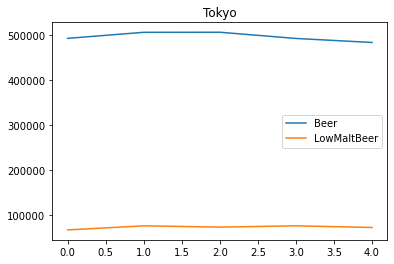

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
Tokyo[["Beer","LowMaltBeer"]].plot(title="Tokyo")

<h3>おまけ2：大阪の情報もグラフ表示</h3>
大阪のビールと発泡酒消費量もグラフ化します。

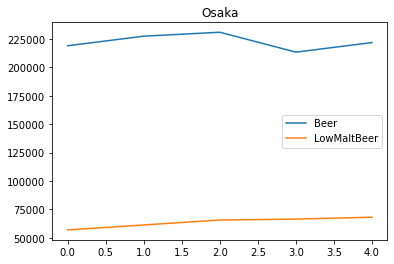

In [9]:
Osaka[["Beer","LowMaltBeer"]].plot(title="Osaka")

<h3>おまけ3:東京の清酒、合成清酒、ビール、発泡酒のヒートマップの表示</h3>

C:\Users\iijima.ISCINTERNAL\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


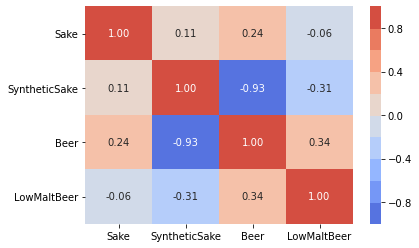

In [10]:
import seaborn as sns
sns.heatmap(Tokyo[[ 'Sake', 'SyntheticSake','Beer','LowMaltBeer']].corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

<h3>おまけ4:大阪の清酒、合成清酒、ビール、発泡酒のヒートマップの表示</h3>

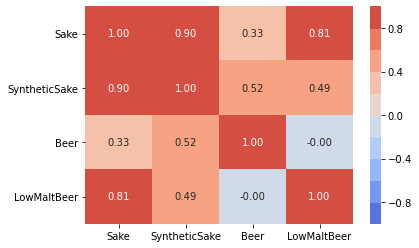

In [11]:
sns.heatmap(Osaka[[ 'Sake', 'SyntheticSake','Beer','LowMaltBeer']].corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

<h3>おまけ5:東京・大阪の連続蒸留焼酎と単式蒸留焼酎の折れ線グラフ</h3>

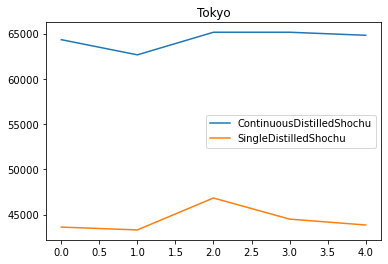

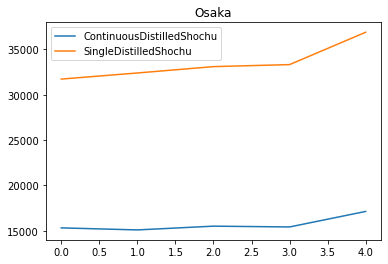

In [12]:
Tokyo[['ContinuousDistilledShochu', 'SingleDistilledShochu']].plot(title="Tokyo")
Osaka[['ContinuousDistilledShochu', 'SingleDistilledShochu']].plot(title="Osaka")

In [13]:
connection.close()